In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('solar.csv')
df = df[5::6]

In [3]:
df

,Year,Month,Day,Hour,Minute,DHI,DNI,Dew Point,Pressure,Temperature,Wind Speed,GHI,Wind Direction,Unnamed: 13,Unnamed: 14
5,2003,1,1,6,30,0,0,22,10080,24,0.0,0,14.4,NaN,NaN
11,2003,1,1,12,30,206,749,20,10060,30,0.0,809,6.9,NaN,NaN
17,2003,1,1,18,30,0,0,19,10070,24,0.2,0,8.2,NaN,NaN
23,2003,1,2,0,30,0,0,19,10070,23,0.2,0,9.2,NaN,NaN
29,2003,1,2,6,30,0,0,20,10100,24,0.1,0,7.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,2011,12,30,18,30,0,0,23,10060,25,0.3,0,10.3,NaN,NaN
8735,2011,12,31,0,30,0,0,22,10060,25,0.3,0,10.3,NaN,NaN
8741,2011,12,31,6,30,0,0,22,10080,25,0.2,0,12.1,NaN,NaN
8747,2011,12,31,12,30,398,156,23,10060,28,0.2,524,14.3,NaN,NaN


<Axes: >

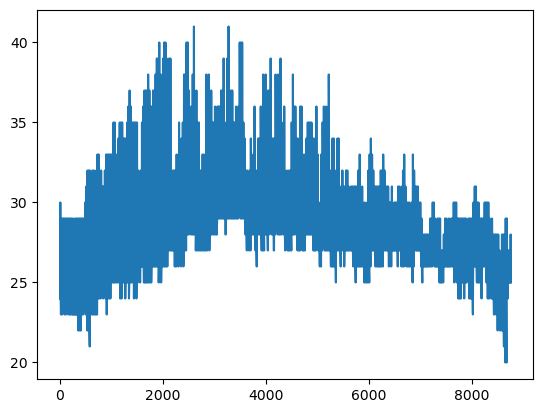

In [4]:
temp = df['Temperature']
temp.plot()

In [5]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [6]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((1454, 5, 1), (1454,))

In [7]:
X_train1, y_train1 = X1[:900], y1[:900]
X_val1, y_val1 = X1[900:1150], y1[900:1150]
X_test1, y_test1 = X1[1150:], y1[1150:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((900, 5, 1), (900,), (250, 5, 1), (250,), (304, 5, 1), (304,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [10]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
26/29 [=========================>....] - ETA: 0s - loss: 830.4923 - root_mean_squared_error: 28.8183INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 21s 454ms/step - loss: 831.1437 - root_mean_squared_error: 28.8296 - val_loss: 761.8271 - val_root_mean_squared_error: 27.6012
Epoch 2/100
27/29 [==========================>...] - ETA: 0s - loss: 817.6337 - root_mean_squared_error: 28.5943INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 11s 402ms/step - loss: 816.7855 - root_mean_squared_error: 28.5795 - val_loss: 747.0842 - val_root_mean_squared_error: 27.3328
Epoch 3/100
27/29 [==========================>...] - ETA: 0s - loss: 798.1867 - root_mean_squared_error: 28.2522INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 12s 430ms/step - loss: 797.3892 - root_mean_squared_error: 28.2381 - val_loss: 723.4508 - val_root_mean_squared_error: 26.8970
Epoch 4/100
28/29 [===========================>..] - ETA: 0s - loss: 772.1896 - root_mean_squared_error: 27.7883INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 13s 468ms/step - loss: 771.8235 - root_mean_squared_error: 27.7817 - val_loss: 697.0237 - val_root_mean_squared_error: 26.4012
Epoch 5/100
27/29 [==========================>...] - ETA: 0s - loss: 745.4877 - root_mean_squared_error: 27.3036INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 11s 405ms/step - loss: 743.6491 - root_mean_squared_error: 27.2699 - val_loss: 667.7166 - val_root_mean_squared_error: 25.8402
Epoch 6/100
26/29 [=========================>....] - ETA: 0s - loss: 714.2773 - root_mean_squared_error: 26.7260INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 320ms/step - loss: 712.3392 - root_mean_squared_error: 26.6897 - val_loss: 635.3839 - val_root_mean_squared_error: 25.2068
Epoch 7/100
27/29 [==========================>...] - ETA: 0s - loss: 680.3667 - root_mean_squared_error: 26.0838INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 10s 363ms/step - loss: 677.2878 - root_mean_squared_error: 26.0248 - val_loss: 597.7073 - val_root_mean_squared_error: 24.4481
Epoch 8/100
26/29 [=========================>....] - ETA: 0s - loss: 637.9932 - root_mean_squared_error: 25.2585INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 300ms/step - loss: 635.1678 - root_mean_squared_error: 25.2025 - val_loss: 551.5524 - val_root_mean_squared_error: 23.4852
Epoch 9/100
24/29 [=======================>......] - ETA: 0s - loss: 583.9038 - root_mean_squared_error: 24.1641INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 10s 352ms/step - loss: 585.5165 - root_mean_squared_error: 24.1974 - val_loss: 501.8512 - val_root_mean_squared_error: 22.4020
Epoch 10/100
27/29 [==========================>...] - ETA: 0s - loss: 534.4526 - root_mean_squared_error: 23.1182INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 310ms/step - loss: 533.5289 - root_mean_squared_error: 23.0982 - val_loss: 450.4673 - val_root_mean_squared_error: 21.2242
Epoch 11/100
26/29 [=========================>....] - ETA: 0s - loss: 483.8362 - root_mean_squared_error: 21.9963INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 334ms/step - loss: 480.2385 - root_mean_squared_error: 21.9143 - val_loss: 399.6204 - val_root_mean_squared_error: 19.9905
Epoch 12/100
25/29 [========================>.....] - ETA: 0s - loss: 429.1624 - root_mean_squared_error: 20.7162INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 322ms/step - loss: 428.9797 - root_mean_squared_error: 20.7118 - val_loss: 354.0453 - val_root_mean_squared_error: 18.8161
Epoch 13/100
29/29 [==============================] - ETA: 0s - loss: 383.9552 - root_mean_squared_error: 19.5948INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 311ms/step - loss: 383.9552 - root_mean_squared_error: 19.5948 - val_loss: 315.8301 - val_root_mean_squared_error: 17.7716
Epoch 14/100
28/29 [===========================>..] - ETA: 0s - loss: 347.2179 - root_mean_squared_error: 18.6338INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 10s 361ms/step - loss: 346.7593 - root_mean_squared_error: 18.6215 - val_loss: 284.7581 - val_root_mean_squared_error: 16.8748
Epoch 15/100
26/29 [=========================>....] - ETA: 0s - loss: 314.3701 - root_mean_squared_error: 17.7305INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 300ms/step - loss: 316.3357 - root_mean_squared_error: 17.7858 - val_loss: 259.3443 - val_root_mean_squared_error: 16.1042
Epoch 16/100
25/29 [========================>.....] - ETA: 0s - loss: 292.0096 - root_mean_squared_error: 17.0883INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 10s 352ms/step - loss: 290.9481 - root_mean_squared_error: 17.0572 - val_loss: 237.7456 - val_root_mean_squared_error: 15.4190
Epoch 17/100
25/29 [========================>.....] - ETA: 0s - loss: 271.4034 - root_mean_squared_error: 16.4743INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 328ms/step - loss: 269.3418 - root_mean_squared_error: 16.4116 - val_loss: 219.2141 - val_root_mean_squared_error: 14.8059
Epoch 18/100
25/29 [========================>.....] - ETA: 0s - loss: 251.2155 - root_mean_squared_error: 15.8498INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 11s 387ms/step - loss: 250.6026 - root_mean_squared_error: 15.8304 - val_loss: 202.7248 - val_root_mean_squared_error: 14.2381
Epoch 19/100
28/29 [===========================>..] - ETA: 0s - loss: 233.5611 - root_mean_squared_error: 15.2827INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 10s 342ms/step - loss: 233.3935 - root_mean_squared_error: 15.2772 - val_loss: 187.1230 - val_root_mean_squared_error: 13.6793
Epoch 20/100
24/29 [=======================>......] - ETA: 0s - loss: 216.5329 - root_mean_squared_error: 14.7151INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 269ms/step - loss: 217.0344 - root_mean_squared_error: 14.7321 - val_loss: 172.0428 - val_root_mean_squared_error: 13.1165
Epoch 21/100
27/29 [==========================>...] - ETA: 0s - loss: 201.9690 - root_mean_squared_error: 14.2116INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 326ms/step - loss: 201.1211 - root_mean_squared_error: 14.1817 - val_loss: 157.3434 - val_root_mean_squared_error: 12.5437
Epoch 22/100
23/29 [======================>.......] - ETA: 0s - loss: 188.1477 - root_mean_squared_error: 13.7167INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 277ms/step - loss: 185.6804 - root_mean_squared_error: 13.6265 - val_loss: 143.4760 - val_root_mean_squared_error: 11.9781
Epoch 23/100
23/29 [======================>.......] - ETA: 0s - loss: 169.8299 - root_mean_squared_error: 13.0319INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 323ms/step - loss: 171.1964 - root_mean_squared_error: 13.0842 - val_loss: 130.6834 - val_root_mean_squared_error: 11.4317
Epoch 24/100
29/29 [==============================] - ETA: 0s - loss: 157.8271 - root_mean_squared_error: 12.5629INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 279ms/step - loss: 157.8271 - root_mean_squared_error: 12.5629 - val_loss: 119.1188 - val_root_mean_squared_error: 10.9142
Epoch 25/100
28/29 [===========================>..] - ETA: 0s - loss: 146.1912 - root_mean_squared_error: 12.0910INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 301ms/step - loss: 145.8828 - root_mean_squared_error: 12.0782 - val_loss: 108.8172 - val_root_mean_squared_error: 10.4315
Epoch 26/100
29/29 [==============================] - ETA: 0s - loss: 134.9755 - root_mean_squared_error: 11.6179INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 306ms/step - loss: 134.9755 - root_mean_squared_error: 11.6179 - val_loss: 98.7833 - val_root_mean_squared_error: 9.9390
Epoch 27/100
28/29 [===========================>..] - ETA: 0s - loss: 123.8429 - root_mean_squared_error: 11.1285INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 294ms/step - loss: 123.6914 - root_mean_squared_error: 11.1217 - val_loss: 87.9208 - val_root_mean_squared_error: 9.3766
Epoch 28/100
23/29 [======================>.......] - ETA: 0s - loss: 112.2662 - root_mean_squared_error: 10.5956INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 306ms/step - loss: 112.2664 - root_mean_squared_error: 10.5956 - val_loss: 78.5587 - val_root_mean_squared_error: 8.8633
Epoch 29/100
28/29 [===========================>..] - ETA: 0s - loss: 102.6840 - root_mean_squared_error: 10.1333INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 289ms/step - loss: 102.7178 - root_mean_squared_error: 10.1350 - val_loss: 70.7179 - val_root_mean_squared_error: 8.4094
Epoch 30/100
23/29 [======================>.......] - ETA: 0s - loss: 94.7190 - root_mean_squared_error: 9.7324INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 311ms/step - loss: 94.5276 - root_mean_squared_error: 9.7225 - val_loss: 63.9486 - val_root_mean_squared_error: 7.9968
Epoch 31/100
27/29 [==========================>...] - ETA: 0s - loss: 88.1983 - root_mean_squared_error: 9.3914INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 285ms/step - loss: 87.3263 - root_mean_squared_error: 9.3449 - val_loss: 57.8427 - val_root_mean_squared_error: 7.6054
Epoch 32/100
23/29 [======================>.......] - ETA: 0s - loss: 83.8568 - root_mean_squared_error: 9.1573INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 303ms/step - loss: 80.7727 - root_mean_squared_error: 8.9874 - val_loss: 52.3219 - val_root_mean_squared_error: 7.2334
Epoch 33/100
28/29 [===========================>..] - ETA: 0s - loss: 74.7805 - root_mean_squared_error: 8.6476INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 297ms/step - loss: 74.8056 - root_mean_squared_error: 8.6490 - val_loss: 47.3694 - val_root_mean_squared_error: 6.8825
Epoch 34/100
24/29 [=======================>......] - ETA: 0s - loss: 69.8004 - root_mean_squared_error: 8.3547INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 311ms/step - loss: 69.3713 - root_mean_squared_error: 8.3289 - val_loss: 42.7839 - val_root_mean_squared_error: 6.5409
Epoch 35/100
29/29 [==============================] - ETA: 0s - loss: 64.3395 - root_mean_squared_error: 8.0212INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 289ms/step - loss: 64.3395 - root_mean_squared_error: 8.0212 - val_loss: 38.6371 - val_root_mean_squared_error: 6.2159
Epoch 36/100
29/29 [==============================] - ETA: 0s - loss: 59.6980 - root_mean_squared_error: 7.7264INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 317ms/step - loss: 59.6980 - root_mean_squared_error: 7.7264 - val_loss: 34.7571 - val_root_mean_squared_error: 5.8955
Epoch 37/100
28/29 [===========================>..] - ETA: 0s - loss: 55.5630 - root_mean_squared_error: 7.4541INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 268ms/step - loss: 55.4344 - root_mean_squared_error: 7.4454 - val_loss: 31.2828 - val_root_mean_squared_error: 5.5931
Epoch 38/100
22/29 [=====================>........] - ETA: 0s - loss: 51.9155 - root_mean_squared_error: 7.2052INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 338ms/step - loss: 51.5386 - root_mean_squared_error: 7.1790 - val_loss: 28.1446 - val_root_mean_squared_error: 5.3051
Epoch 39/100
22/29 [=====================>........] - ETA: 0s - loss: 50.0649 - root_mean_squared_error: 7.0757INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 303ms/step - loss: 47.9369 - root_mean_squared_error: 6.9236 - val_loss: 25.1822 - val_root_mean_squared_error: 5.0182
Epoch 40/100
27/29 [==========================>...] - ETA: 0s - loss: 44.6388 - root_mean_squared_error: 6.6812INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 11s 384ms/step - loss: 44.6170 - root_mean_squared_error: 6.6796 - val_loss: 22.6008 - val_root_mean_squared_error: 4.7540
Epoch 41/100
28/29 [===========================>..] - ETA: 0s - loss: 41.4319 - root_mean_squared_error: 6.4368INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 288ms/step - loss: 41.6158 - root_mean_squared_error: 6.4510 - val_loss: 20.2542 - val_root_mean_squared_error: 4.5005
Epoch 42/100
28/29 [===========================>..] - ETA: 0s - loss: 38.8534 - root_mean_squared_error: 6.2333INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 309ms/step - loss: 38.8490 - root_mean_squared_error: 6.2329 - val_loss: 18.0917 - val_root_mean_squared_error: 4.2534
Epoch 43/100
29/29 [==============================] - ETA: 0s - loss: 36.3410 - root_mean_squared_error: 6.0284INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 298ms/step - loss: 36.3410 - root_mean_squared_error: 6.0284 - val_loss: 16.1799 - val_root_mean_squared_error: 4.0224
Epoch 44/100
28/29 [===========================>..] - ETA: 0s - loss: 34.2057 - root_mean_squared_error: 5.8486INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 299ms/step - loss: 34.0740 - root_mean_squared_error: 5.8373 - val_loss: 14.5002 - val_root_mean_squared_error: 3.8079
Epoch 45/100
23/29 [======================>.......] - ETA: 0s - loss: 32.3951 - root_mean_squared_error: 5.6917INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 309ms/step - loss: 32.0580 - root_mean_squared_error: 5.6620 - val_loss: 13.0164 - val_root_mean_squared_error: 3.6078
Epoch 46/100
27/29 [==========================>...] - ETA: 0s - loss: 30.0051 - root_mean_squared_error: 5.4777INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 319ms/step - loss: 30.2124 - root_mean_squared_error: 5.4966 - val_loss: 11.6789 - val_root_mean_squared_error: 3.4174
Epoch 47/100
29/29 [==============================] - ETA: 0s - loss: 28.5387 - root_mean_squared_error: 5.3422INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 12s 445ms/step - loss: 28.5387 - root_mean_squared_error: 5.3422 - val_loss: 10.5040 - val_root_mean_squared_error: 3.2410
Epoch 48/100
24/29 [=======================>......] - ETA: 0s - loss: 27.4939 - root_mean_squared_error: 5.2435INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 13s 465ms/step - loss: 27.0503 - root_mean_squared_error: 5.2010 - val_loss: 9.4501 - val_root_mean_squared_error: 3.0741
Epoch 49/100
25/29 [========================>.....] - ETA: 0s - loss: 25.7508 - root_mean_squared_error: 5.0745INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 14s 508ms/step - loss: 25.6623 - root_mean_squared_error: 5.0658 - val_loss: 8.5446 - val_root_mean_squared_error: 2.9231
Epoch 50/100
24/29 [=======================>......] - ETA: 0s - loss: 23.7148 - root_mean_squared_error: 4.8698INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 14s 493ms/step - loss: 24.4215 - root_mean_squared_error: 4.9418 - val_loss: 7.7357 - val_root_mean_squared_error: 2.7813
Epoch 51/100
25/29 [========================>.....] - ETA: 0s - loss: 23.6877 - root_mean_squared_error: 4.8670INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 13s 473ms/step - loss: 23.3527 - root_mean_squared_error: 4.8325 - val_loss: 7.0583 - val_root_mean_squared_error: 2.6567
Epoch 52/100
29/29 [==============================] - ETA: 0s - loss: 22.4001 - root_mean_squared_error: 4.7329INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 15s 529ms/step - loss: 22.4001 - root_mean_squared_error: 4.7329 - val_loss: 6.4778 - val_root_mean_squared_error: 2.5452
Epoch 53/100
29/29 [==============================] - ETA: 0s - loss: 21.5644 - root_mean_squared_error: 4.6437INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 14s 495ms/step - loss: 21.5644 - root_mean_squared_error: 4.6437 - val_loss: 5.9953 - val_root_mean_squared_error: 2.4485
Epoch 54/100
24/29 [=======================>......] - ETA: 0s - loss: 21.2281 - root_mean_squared_error: 4.6074INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 15s 519ms/step - loss: 20.7934 - root_mean_squared_error: 4.5600 - val_loss: 5.5649 - val_root_mean_squared_error: 2.3590
Epoch 55/100
25/29 [========================>.....] - ETA: 0s - loss: 20.6005 - root_mean_squared_error: 4.5388INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 12s 418ms/step - loss: 20.1289 - root_mean_squared_error: 4.4865 - val_loss: 5.2142 - val_root_mean_squared_error: 2.2835
Epoch 56/100
26/29 [=========================>....] - ETA: 0s - loss: 19.1167 - root_mean_squared_error: 4.3723INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 323ms/step - loss: 19.5329 - root_mean_squared_error: 4.4196 - val_loss: 4.9318 - val_root_mean_squared_error: 2.2208
Epoch 57/100
29/29 [==============================] - ETA: 0s - loss: 19.0100 - root_mean_squared_error: 4.3600INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 12s 445ms/step - loss: 19.0100 - root_mean_squared_error: 4.3600 - val_loss: 4.6880 - val_root_mean_squared_error: 2.1652
Epoch 58/100
27/29 [==========================>...] - ETA: 0s - loss: 18.9249 - root_mean_squared_error: 4.3503INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 14s 492ms/step - loss: 18.5489 - root_mean_squared_error: 4.3068 - val_loss: 4.5037 - val_root_mean_squared_error: 2.1222
Epoch 59/100
29/29 [==============================] - ETA: 0s - loss: 18.1678 - root_mean_squared_error: 4.2624INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 14s 517ms/step - loss: 18.1678 - root_mean_squared_error: 4.2624 - val_loss: 4.3666 - val_root_mean_squared_error: 2.0896
Epoch 60/100
24/29 [=======================>......] - ETA: 0s - loss: 18.1224 - root_mean_squared_error: 4.2570INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 12s 434ms/step - loss: 17.8469 - root_mean_squared_error: 4.2246 - val_loss: 4.2671 - val_root_mean_squared_error: 2.0657
Epoch 61/100
29/29 [==============================] - ETA: 0s - loss: 17.5662 - root_mean_squared_error: 4.1912INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 11s 407ms/step - loss: 17.5662 - root_mean_squared_error: 4.1912 - val_loss: 4.1912 - val_root_mean_squared_error: 2.0472
Epoch 62/100
27/29 [==========================>...] - ETA: 0s - loss: 17.2893 - root_mean_squared_error: 4.1580INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 335ms/step - loss: 17.3265 - root_mean_squared_error: 4.1625 - val_loss: 4.1439 - val_root_mean_squared_error: 2.0356
Epoch 63/100
23/29 [======================>.......] - ETA: 0s - loss: 16.9606 - root_mean_squared_error: 4.1183INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 9s 308ms/step - loss: 17.1193 - root_mean_squared_error: 4.1375 - val_loss: 4.1130 - val_root_mean_squared_error: 2.0281
Epoch 64/100
28/29 [===========================>..] - ETA: 0s - loss: 16.9092 - root_mean_squared_error: 4.1121INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


29/29 [==============================] - 8s 292ms/step - loss: 16.9454 - root_mean_squared_error: 4.1165 - val_loss: 4.0998 - val_root_mean_squared_error: 2.0248
Epoch 65/100
29/29 [==============================] - 0s 10ms/step - loss: 16.7951 - root_mean_squared_error: 4.0982 - val_loss: 4.1009 - val_root_mean_squared_error: 2.0251
Epoch 66/100
29/29 [==============================] - 0s 10ms/step - loss: 16.6552 - root_mean_squared_error: 4.0811 - val_loss: 4.1120 - val_root_mean_squared_error: 2.0278
Epoch 67/100
29/29 [==============================] - 0s 11ms/step - loss: 16.5493 - root_mean_squared_error: 4.0681 - val_loss: 4.1316 - val_root_mean_squared_error: 2.0326
Epoch 68/100
29/29 [==============================] - 0s 13ms/step - loss: 16.4558 - root_mean_squared_error: 4.0566 - val_loss: 4.1598 - val_root_mean_squared_error: 2.0396
Epoch 69/100
29/29 [==============================] - 0s 12ms/step - loss: 16.3804 - root_mean_squared_error: 4.0473 - val_loss: 4.1932 - val_

In [14]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [15]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

29/29 [==============================] - 1s 5ms/step


,Train Predictions,Actuals
0,28.156105,29
1,28.164856,24
2,28.159046,23
3,28.155886,24
4,28.156666,29
...,...,...
895,28.159275,27
896,28.155123,34
897,28.158964,30
898,28.161182,27


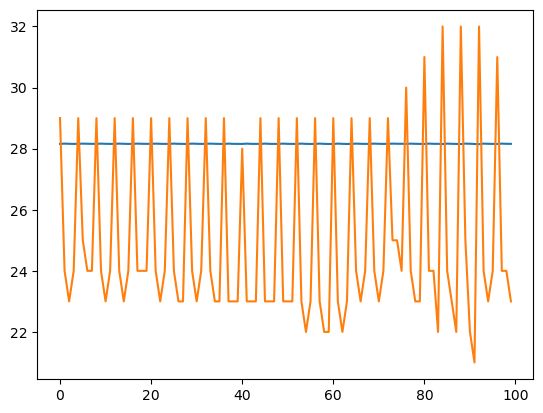

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [17]:
import random
import time
import mysql.connector
from datetime import datetime

# Connect to your MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="lass"
)
cursor = conn.cursor()
for(row,rs)in train_results.iterrows():
    a=str(rs[0])
    b=str(rs[1])
    
    q="INSERT INTO weatherdata(predicted,actual) VALUES (%s,%s)"
    data=(a,b)
    cursor.execute(q,data)
    conn.commit()
cursor.close()
conn.close()